In [1]:
from sklearn.datasets import fetch_mldata
mnist = fetch_mldata('MNIST original')

In [2]:
import sklearn
from sklearn import linear_model, decomposition
from sklearn.pipeline import Pipeline
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline

/home/kacper/anaconda3/lib/python3.5/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [3]:
#Wczytujemy dane i skalujemy
X, Y = mnist.data.astype("float64"), mnist.target 
X = preprocessing.scale(X)

In [4]:
#Dzielimy na dane trenujące i testujące
X_train, X_test, Y_train, Y_test = train_test_split(X,Y)

### Cwiczenie 1 (1 pkt)

Prosze narysowac wykres (plt.plot) dokladnosci w zaleznosci od wartosci C na zbiorze treningowym i testowym (dla tych N=500 przykladow)

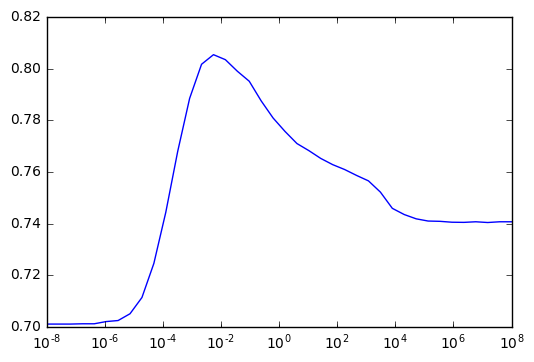

In [5]:
N = 500
C_arr = [10**t for t in np.linspace(-8,8, 40)]
acc = []
for c in C_arr:
    model = LogisticRegression(C=c)
    model.fit(X_train[0:N], Y_train[0:N])
    Y_test_predicted = model.predict(X_test)
    acc.append(sklearn.metrics.accuracy_score(Y_test, Y_test_predicted))
    
plt.semilogx(C_arr, acc)

### Cwiczenie 2 (2 pkt)

(Punkt za narysowanie oraz punkt za poprawne wytłumaczenie)


Proszę narysować jak wyglądaja nauczone wagi modelu dla różnych wartości parametru C (należy użyc plt.imshow). Z czego wynikają różnice w narysowanych obrazkach? 

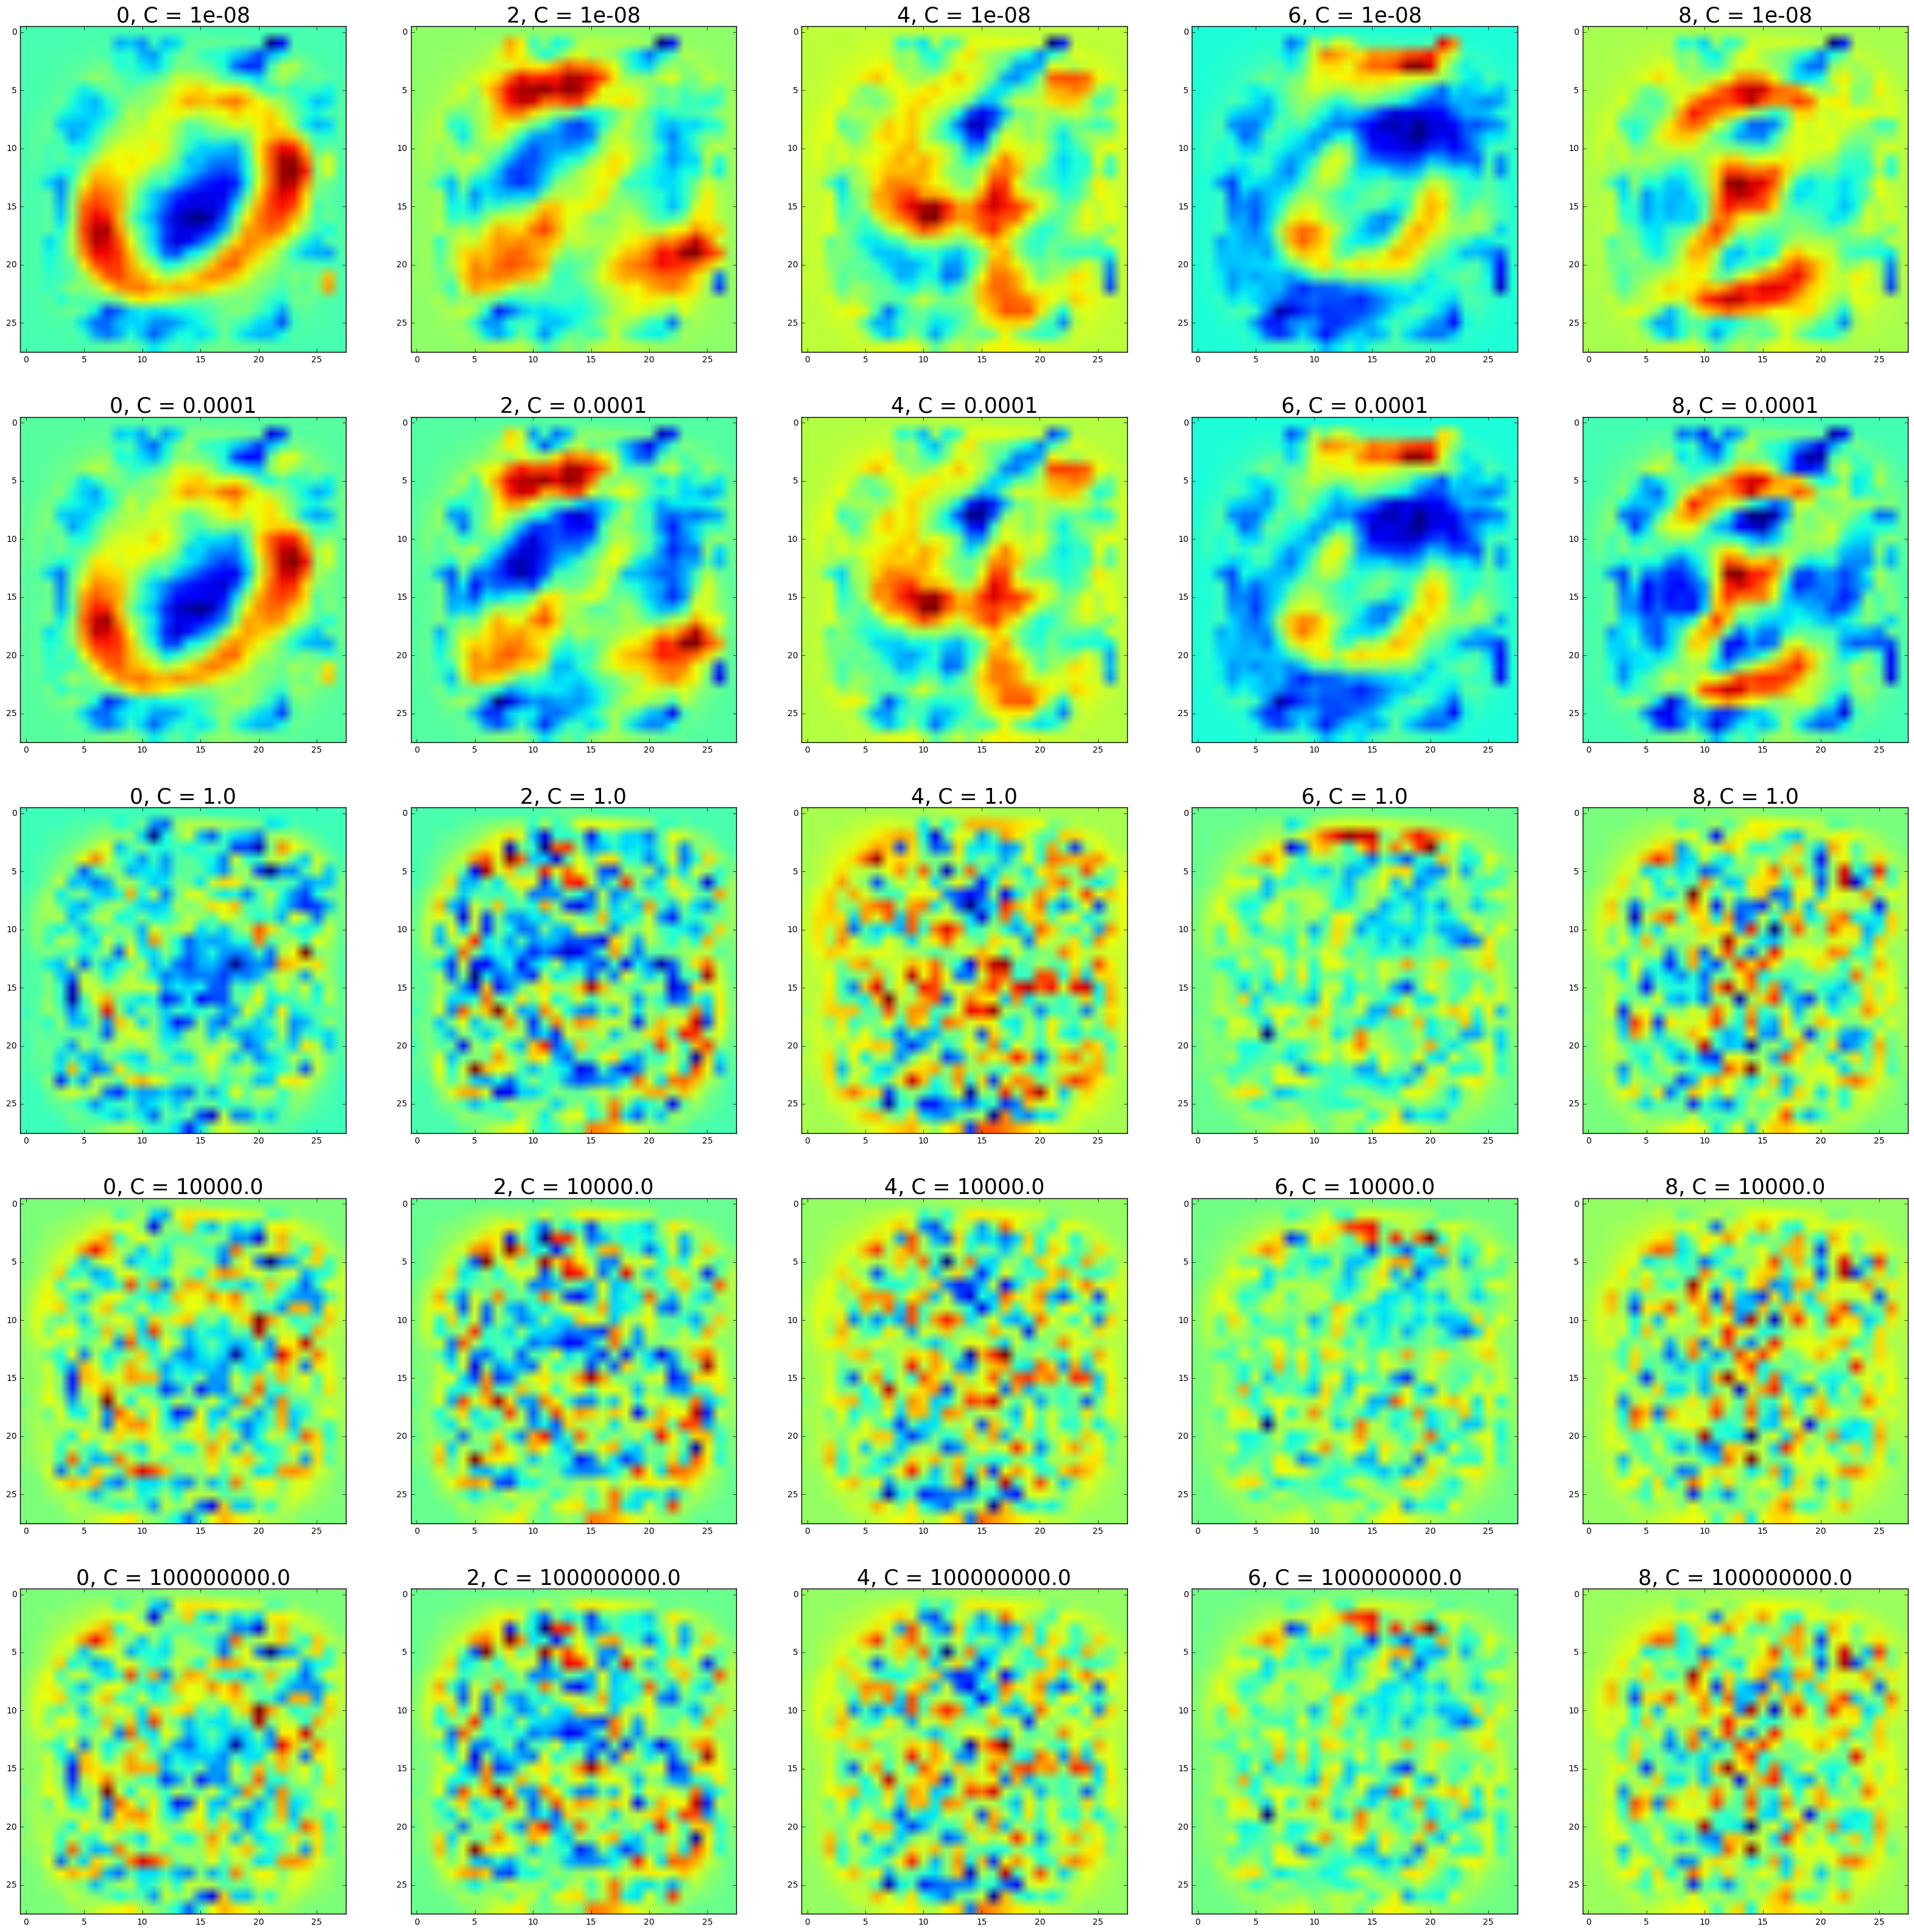

In [6]:
fig = plt.figure(1, figsize = (40, 40))


N = 500
C_arr = [10**t for t in np.linspace(-8,8, 5)]
acc = []
for j, c in enumerate(C_arr):
    for i, num in enumerate([0,2,4,6,8]):
        plt.subplot(5,5,j*5 + i+1)
        model = LogisticRegression(C=c)
        model.fit(X_train[0:N], Y_train[0:N])
        Y_test_predicted = model.predict(X_test)
        acc.append(sklearn.metrics.accuracy_score(Y_test, Y_test_predicted))
        plt.imshow(model.coef_[num].reshape(28,28))
        plt.title("{0}, C = {1}".format(num, c), fontsize = 25)


## Parametr C można tłumaczyć jako stopień skomplikowania modelu. Przy niskich wartościach, z wag modelu można łatwo wychwycić kształt cyfry. Gdy dopuszczamy większe skomplikowanie modelu, doszukuje się on bardziej szczegółowych cech, przez co segmenty o wyższych wagach są bardziej rozproszone, mniejsze i liczniejsze. 